In [91]:
import sqlite3
from galvani import res2sqlite as r2s
import matplotlib.pyplot as plt
import pandas as pd

## Loading in the .res file

You should ideally only have to change the Input_file in order to locate the .res file on your computer - make sure you include the filepath to the correct folder as well!

In [2]:
Input_file = "downloads/fs491_SPS29C_3rdCell_ChDch_part1.res"
Output_file = 'temporary_file'
r2s.convert_arbin_to_sqlite(Input_file, Output_file)

Reading Version_Table...
Reading Global_Table...
Reading Resume_Table...
Reading Channel_Normal_Table...
Creating indices for Channel_Normal_Table...
Reading Channel_Statistic_Table...
Reading Auxiliary_Table...
Reading Event_Table...
Reading Smart_Battery_Info_Table...
Reading Smart_Battery_Data_Table...
Reading MCell_Aci_Data_Table...
Reading Aux_Global_Data_Table...
Reading Smart_Battery_Clock_Stretch_Table...
Creating helper table for capacity and energy totals...
Vacuuming database...


In [5]:
dat = sqlite3.connect(Output_file)
query = dat.execute("SELECT * From Channel_Normal_Table")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
dat.close()

In [56]:
results.set_index('Data_Point', inplace=True)
results.sort_index(inplace=True)

In [63]:
results['Capacity'] = results['Charge_Capacity'] + results['Discharge_Capacity']

# Plotting data

For all of this stuff coming up you can format the plots using matplotlib - eg changing font sizes etc. You should be able to google this stuff, if not just ask me!

Also I've included the code to save the figure to your computer - you just need to uncomment the plt.savefig(filename) part and input your own filename. I like to save mine as a pdf and set the dpi=220 for better quality figures:

plt.savefig(filename.pdf, dpi=220) should work for this!

You can change the figure size by editing the numbers in the plt.figure(figsize=(8, 6)) line of code, the first number is the x size, the second the y size

## Charge Capacity

Text(0.5, 0, 'Cycle')

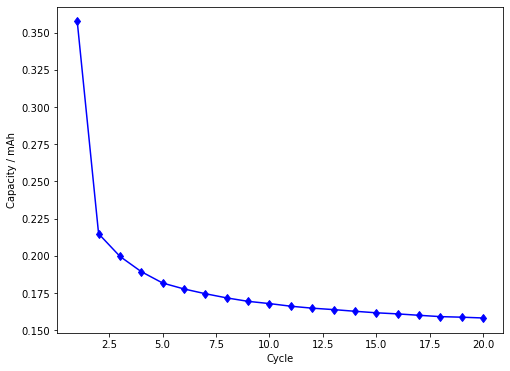

In [87]:
plt.figure(figsize=(8,6))
plt.plot(results.groupby('Cycle_Index')['Charge_Capacity'].max()[:-1]*1000, 'b-d')
plt.ylabel('Capacity / mAh')
plt.xlabel('Cycle')
# plt.savefig("filename")

## Discharge Capacity

Text(0.5, 0, 'Cycle')

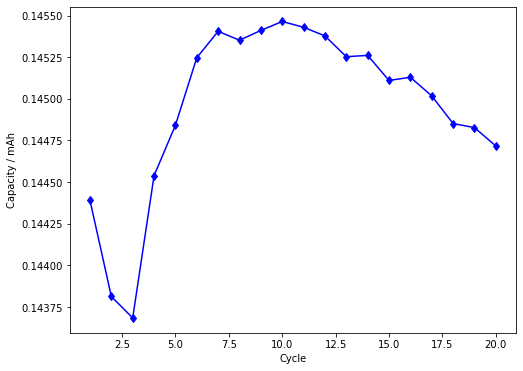

In [88]:
plt.figure(figsize=(8,6))
plt.plot(results.groupby('Cycle_Index')['Discharge_Capacity'].max()[:-1]*1000, 'b-d')
plt.ylabel('Capacity / mAh')
plt.xlabel('Cycle')
# plt.savefig("filename")

## Individual Cycles

Simply change the cycle numbers in the cycle_list that you want to plot! You may also want to add units (I'm not sure what capacity units but I'm assuming its Ah - if not change this. I've added a factor of 1000 so it's converted to mAh

Text(0, 0.5, 'Voltage / V')

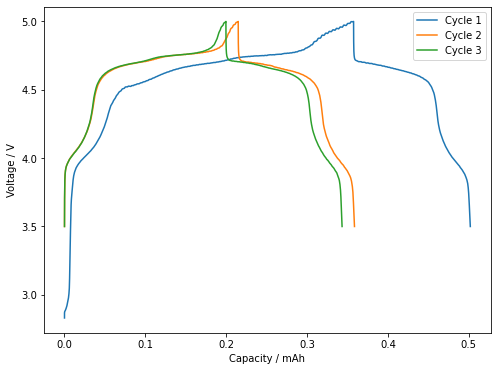

In [89]:
plt.figure(figsize=(8,6))
cycle_list = [1, 2, 3]
for cycle in cycle_list:
    mask1 = (results['Cycle_Index'] == cycle) 
    mask2 = (results['Cycle_Index'] == cycle)
    plt.plot((results[mask1]['Charge_Capacity'] + results[mask1]['Discharge_Capacity'])*1000, 
             results[mask1]['Voltage'], 
             label=f"Cycle {cycle}")
plt.legend()
plt.xlabel('Capacity / mAh')
plt.ylabel('Voltage / V')
# plt.savefig("filename")

If you want to plot all files but with a colormap instead

Text(0, 0.5, 'Voltage / V')

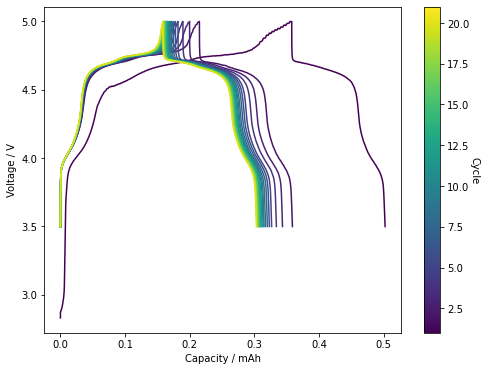

In [90]:
# Setting up colormap
plt.figure(figsize=(8,6))
import matplotlib.cm as cm
from matplotlib.colors import Normalize
cycles = results['Cycle_Index'].unique()
cm = plt.get_cmap('viridis')
norm = Normalize(vmin=min(cycles), vmax=max(cycles))
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)

# fake up the array of the scalar mappable. Urgh...
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label(f'Cycle', rotation=270, labelpad=10)

for cycle in cycles:
    mask1 = (results['Cycle_Index'] == cycle) 
    mask2 = (results['Cycle_Index'] == cycle)
    plt.plot((results[mask1]['Charge_Capacity'] + results[mask1]['Discharge_Capacity'])*1000, 
             results[mask1]['Voltage'],
            color=cm(norm(cycle)))

plt.xlabel('Capacity / mAh')
plt.ylabel('Voltage / V')
# plt.savefig("filename")